In [77]:
from ml_util import *

In [78]:
# Espaços de features polinomiais
import numpy as np

def gera_dados(N = 100):

    np.random.seed(42)

    X = np.random.uniform(-1.5, 1.5, N)

    b0, b1, b2, b3, b4 = 0, -0.2, 0.2, 0.2, 0.6

    y = b0 + b1*X + b2*(X**2) + b3*(X**3) + b4*(X**4) + np.random.normal(0, 0.25, N)

    X = X.reshape(-1, 1)

    return X, y

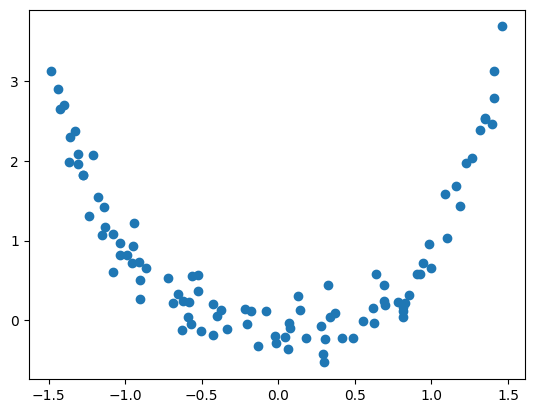

In [79]:
X, y = gera_dados(N=100)

plt.scatter(X, y)

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

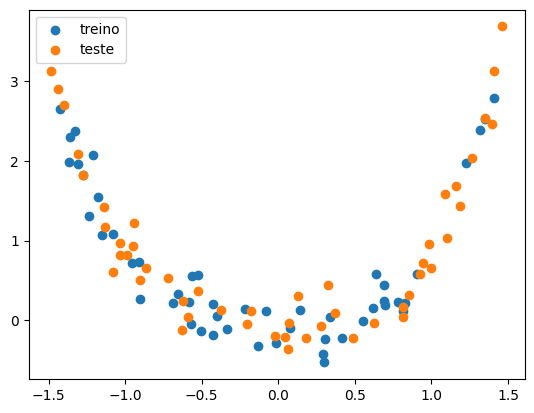

In [81]:
plt.scatter(X_train, y_train, label="treino")
plt.scatter(X_test, y_test, label="teste")

plt.legend()
plt.show()

In [82]:
from sklearn.linear_model import LinearRegression

reglin = LinearRegression().fit(X_train, y_train)


In [83]:
_ = reg_metrics_train_test(reglin, X_train, y_train, X_test, y_test)


Metricas de avaliação (dados de treino):

R^2: 0.04
MAE: 0.73
RMSE: 0.92
MAPE: 400.70%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: -0.13
MAE: 0.81
RMSE: 1.09
MAPE: 305.02%


In [48]:
reglin.intercept_, reglin.coef_

(0.6461691325659312, array([-0.23617662]))

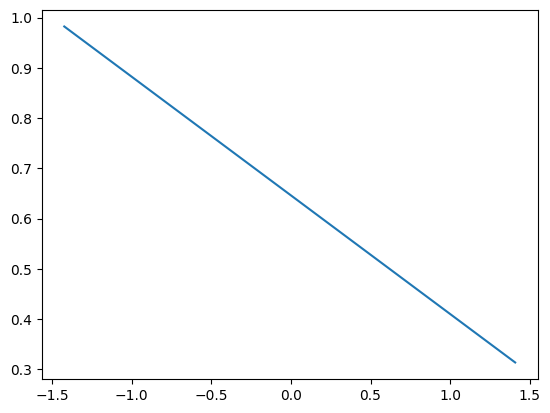

In [49]:
x_plot_modelo = np.linspace(X_train.min(), X_train.max(), 2)
y_plot_modelo = reglin.intercept_ + reglin.coef_[0]*x_plot_modelo

plt.plot(x_plot_modelo, y_plot_modelo)

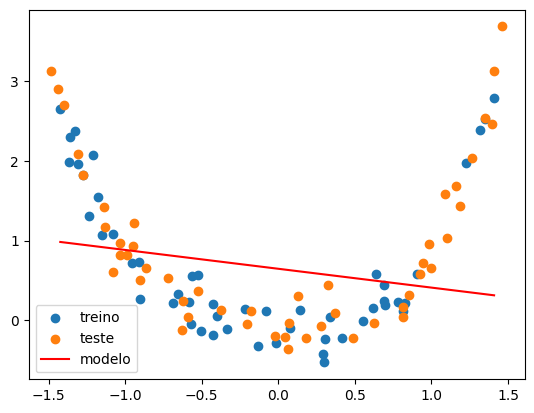

In [51]:
plt.scatter(X_train, y_train, label="treino")
plt.scatter(X_test, y_test, label="teste")

x_plot_modelo = np.linspace(X_train.min(), X_train.max(), 2)
y_plot_modelo = reglin.intercept_ + reglin.coef_[0]*x_plot_modelo

plt.plot(x_plot_modelo, y_plot_modelo, color="red", label="modelo")

plt.legend()
plt.show()

In [52]:
Z_train =  X_train**2
Z_test = X_test**2

reglin_z = LinearRegression().fit(Z_train, y_train)

In [53]:
_ = reg_metrics_train_test(reglin_z, Z_train, y_train, Z_test, y_test)


Metricas de avaliação (dados de treino):

R^2: 0.92
MAE: 0.23
RMSE: 0.27
MAPE: 123.31%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.89
MAE: 0.27
RMSE: 0.34
MAPE: 135.81%


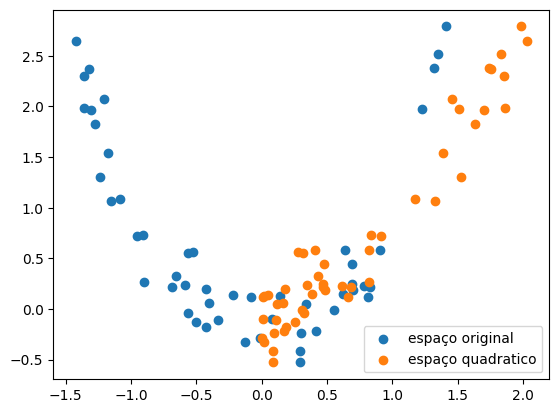

In [54]:
plt.scatter(X_train, y_train, label="espaço original")
plt.scatter(Z_train, y_train, label="espaço quadratico")

plt.legend()
plt.show()

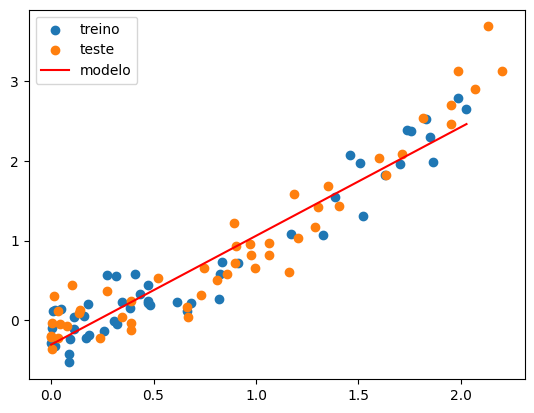

In [57]:
plt.scatter(Z_train, y_train, label="treino")
#plt.scatter(Z_test, y_test, label="teste")

x_plot_modelo = np.linspace(Z_train.min(), Z_train.max(), 2)
y_plot_modelo = reglin_z.intercept_ + reglin_z.coef_[0]*x_plot_modelo

plt.plot(x_plot_modelo, y_plot_modelo, color="red", label="modelo")

plt.legend()
plt.show()

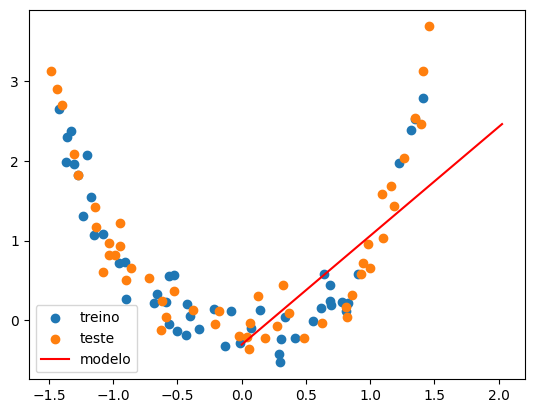

In [58]:
plt.scatter(X_train, y_train, label="treino")
plt.scatter(X_test, y_test, label="teste")

x_plot_modelo = np.linspace(Z_train.min(), Z_train.max(), 2)
y_plot_modelo = reglin_z.intercept_ + reglin_z.coef_[0]*x_plot_modelo

plt.plot(x_plot_modelo, y_plot_modelo, color="red", label="modelo")

plt.legend()
plt.show()

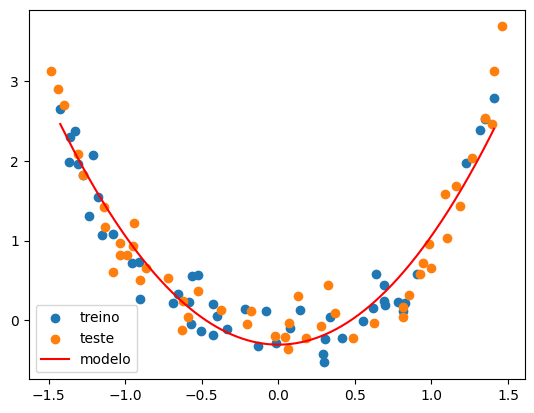

In [59]:
plt.scatter(X_train, y_train, label="treino")
plt.scatter(X_test, y_test, label="teste")

x_plot_modelo = np.linspace(X_train.min(), X_train.max(), 10000)
y_plot_modelo = reglin_z.intercept_ + reglin_z.coef_[0]*(x_plot_modelo**2)

plt.plot(x_plot_modelo, y_plot_modelo, color="red", label="modelo")

plt.legend()
plt.show()

In [60]:
X_train.squeeze()

array([-0.13179005,  0.29597545,  0.07426929,  0.55269908,  0.30334504,
       -0.42460281, -1.32574916, -0.65719647, -0.58615869, -0.08335522,
       -1.23452249, -1.17632572,  0.29369994,  1.22796121,  1.40875388,
        0.90659094, -0.56486677, -1.27634807, -0.6859529 , -0.21737694,
       -1.15239282, -0.01446927, -1.36431813,  0.14013084, -1.42374262,
       -0.91205141,  0.6870215 , -1.30484522,  0.81290154, -0.52400901,
       -0.42974002, -0.56705303, -1.20698366, -1.36064876,  1.35214292,
        1.31849682, -1.08151842,  0.69598183, -0.40091447,  0.41267241,
        0.63973436,  0.62057203,  0.68881854, -0.50730593,  0.33555868,
       -0.33396813, -0.90385296, -0.9545251 ,  0.78235515,  0.82539847])

In [62]:
X_train_xz = pd.DataFrame({
    "X": X_train.squeeze(),
    "Y": X_train.squeeze()**2
})

X_test_xz = pd.DataFrame({
    "X": X_test.squeeze(),
    "Y": X_test.squeeze()**2
})

In [63]:
reglin_xz = LinearRegression().fit(X_train_xz, y_train)

In [64]:
_ = reg_metrics_train_test(reglin_xz, X_train_xz, y_train, X_test_xz, y_test)


Metricas de avaliação (dados de treino):

R^2: 0.92
MAE: 0.22
RMSE: 0.27
MAPE: 130.54%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.89
MAE: 0.27
RMSE: 0.34
MAPE: 139.58%


In [67]:
def plot_reglin_poly_feature(modelo, X_train, y_train, X_test, y_test):

    title = "Modelo de Regressão Linear"

    n_features = len(modelo.coef_)

    if n_features > 1:
        title += f" - com features polinomiais de grau {n_features}"

    plt.title(title)

    plt.scatter(X_train, y_train, label="treino")
    plt.scatter(X_test, y_test, label="teste")

    x_plot_modelo = np.linspace(X_train.min(), X_train.max(), 10000)

    y_plot_modelo = modelo.intercept_ 

    for i in range(n_features):
        y_plot_modelo += modelo.coef_[i]*(x_plot_modelo**(i+1))


    plt.plot(x_plot_modelo, y_plot_modelo, color="red", label="modelo")

    plt.legend()
    plt.show()


Metricas de avaliação (dados de treino):

R^2: 0.92
MAE: 0.21
RMSE: 0.26
MAPE: 107.75%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.90
MAE: 0.27
RMSE: 0.33
MAPE: 136.02%


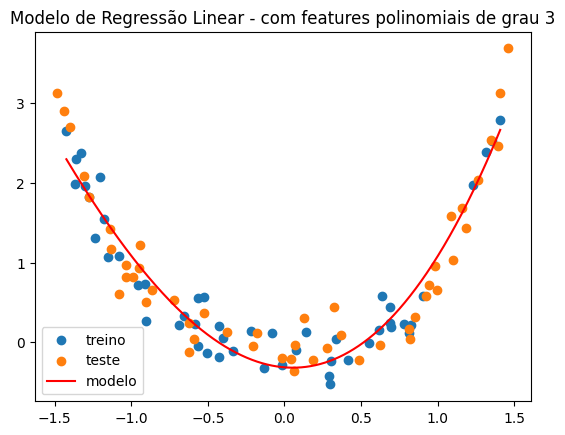

In [71]:
X_train_cubo = pd.DataFrame({
    "X_1": X_train.squeeze(),
    "X_2": X_train.squeeze()**2,
    "X_3": X_train.squeeze()**3
})

X_test_cubo = pd.DataFrame({
    "X_1": X_test.squeeze(),
    "X_2": X_test.squeeze()**2,
    "X_3": X_test.squeeze()**3
})

reglin_cubo = LinearRegression().fit(X_train_cubo, y_train)

_ = reg_metrics_train_test(reglin_cubo, X_train_cubo, y_train, X_test_cubo, y_test)

plot_reglin_poly_feature(reglin_cubo, X_train, y_train, X_test, y_test)

In [75]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False).fit(X_train)

X_train_transf = pf.transform(X_train)
X_test_transf = pf.transform(X_test)